### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Φίλιππος Μαρντιροσιάν

Α.Μ.: 03120034

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [1]:
# Load the image
import numpy as np
indian_pines_image = np.load('indian_pines_corrected.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [2]:
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

# Φόρτωση των επισημειώσεων ανά pixel
indian_pines_labels = np.load('indian_pines_gt.npy')

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [3]:
import matplotlib.pyplot as plt

# 2α. Πληροφορίες για τις διαστάσεις και τον αριθμό των καναλιών
height, width, num_channels = indian_pines_image.shape
print(f"Ύψος: {height}, Πλάτος: {width}, Κανάλια: {num_channels}")

Ύψος: 145, Πλάτος: 145, Κανάλια: 200


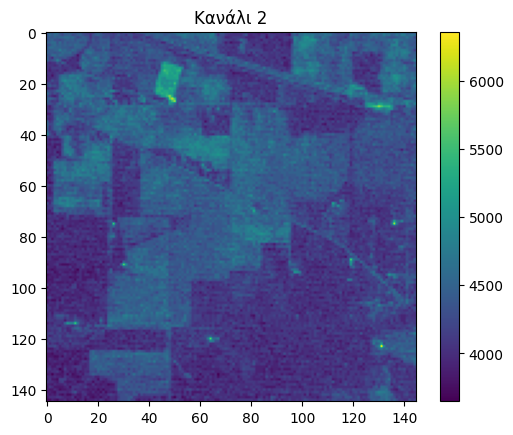

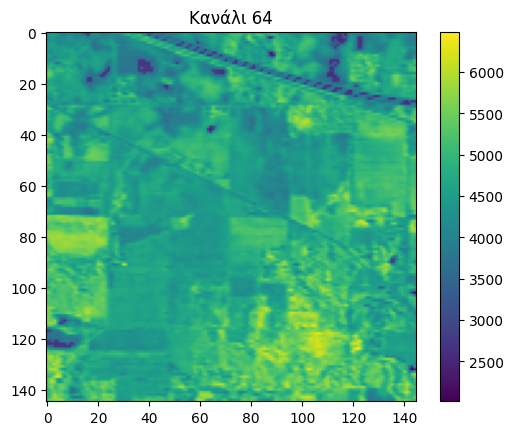

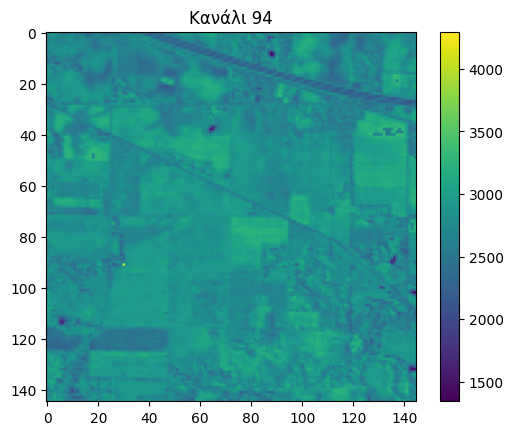

In [4]:
# 2β. Σχεδίαση του 3ου, 65ου και 95ου καναλιού
channels_to_plot = [2, 64, 94]  # Οι αρίθμοι των καναλιών ξεκινούν από το 0
for channel in channels_to_plot:
    plt.figure()
    plt.imshow(indian_pines_image[:, :, channel], cmap='viridis')
    plt.title(f"Κανάλι {channel}")
    plt.colorbar()
    plt.show()

In [5]:
# 2γ. Αριθμός διαφορετικών κατηγοριών
num_categories = len(np.unique(indian_pines_labels))
print(f"Αριθμός διαφορετικών κατηγοριών: {num_categories}")

Αριθμός διαφορετικών κατηγοριών: 17


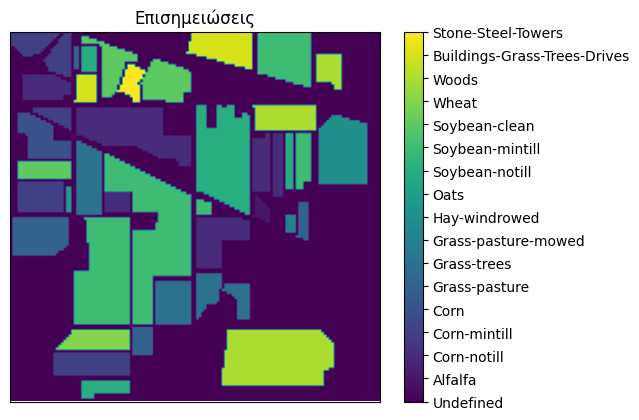

In [6]:
# 2δ. Σχεδίαση των επισημειώσεων
plt.figure()
plt.imshow(indian_pines_labels, cmap='viridis')
plt.title("Επισημειώσεις")
cbar = plt.colorbar(ticks=np.unique(indian_pines_labels))

# Map class indices to class names for annotation
cbar.set_ticklabels(classes)

plt.xticks([]), plt.yticks([])  # Απενεργοποίηση των δεικτών
plt.show()

In [7]:
# 2ε. Υπολογισμός πλήθους pixels για κάθε κατηγορία
category_counts = np.zeros(num_categories)
for category in range(num_categories):
    category_counts[category] = np.sum(indian_pines_labels == category)

for i, count in enumerate(category_counts):
    print(f"{classes[i]}: {int(count)} pixels")

Undefined: 10776 pixels
Alfalfa: 46 pixels
Corn-notill: 1428 pixels
Corn-mintill: 830 pixels
Corn: 237 pixels
Grass-pasture: 483 pixels
Grass-trees: 730 pixels
Grass-pasture-mowed: 28 pixels
Hay-windrowed: 478 pixels
Oats: 20 pixels
Soybean-notill: 972 pixels
Soybean-mintill: 2455 pixels
Soybean-clean: 593 pixels
Wheat: 205 pixels
Woods: 1265 pixels
Buildings-Grass-Trees-Drives: 386 pixels
Stone-Steel-Towers: 93 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [8]:
# 3α. Μετατροπή σε κατάλληλη μορφή
image_reshaped = indian_pines_image.reshape(-1, indian_pines_image.shape[-1])
labels_reshaped = indian_pines_labels.flatten()

# Αφαίρεση των Undefined δεδομένων
valid_indices = labels_reshaped != 0
image_reshaped = image_reshaped[valid_indices]
labels_reshaped = labels_reshaped[valid_indices]

# to check the dimensions are correct:
print(indian_pines_image.shape)
print(indian_pines_labels.shape)
print(image_reshaped.shape) # 10249 = 21025-10776
print(labels_reshaped.shape) # where 10776 = #undefined

(145, 145, 200)
(145, 145)
(10249, 200)
(10249,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [9]:
# 3β. Επιλογή ενός τυχαίου pixel από κάθε κατηγορία
unique_labels = np.unique(labels_reshaped)
selected_pixels = []

for label in unique_labels:
    indices = np.where(labels_reshaped == label)[0]
    random_index = np.random.choice(indices)
    selected_pixels.append(random_index)

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

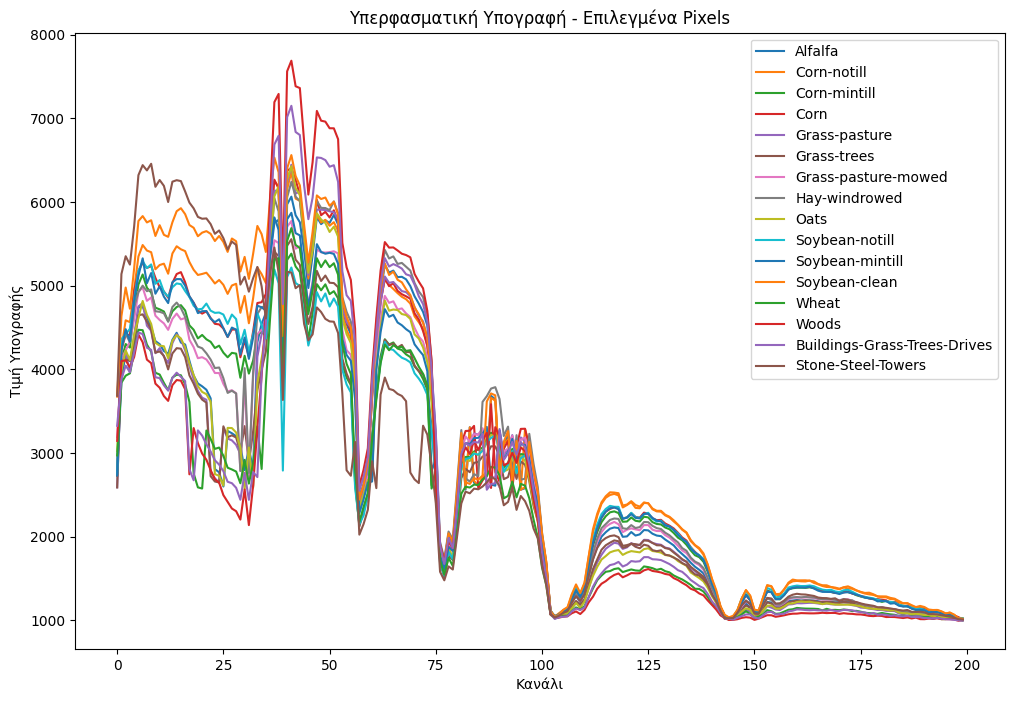

In [10]:
# 3γ. Σχεδίαση της υπερφασματικής υπογραφής των επιλεγμένων pixels
plt.figure(figsize=(12, 8))
for i, index in enumerate(selected_pixels):
    plt.plot(image_reshaped[index], label=f"{classes[i+1]}")

plt.title("Υπερφασματική Υπογραφή - Επιλεγμένα Pixels")
plt.xlabel("Κανάλι")
plt.ylabel("Τιμή Υπογραφής")
plt.legend()
plt.show()


3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

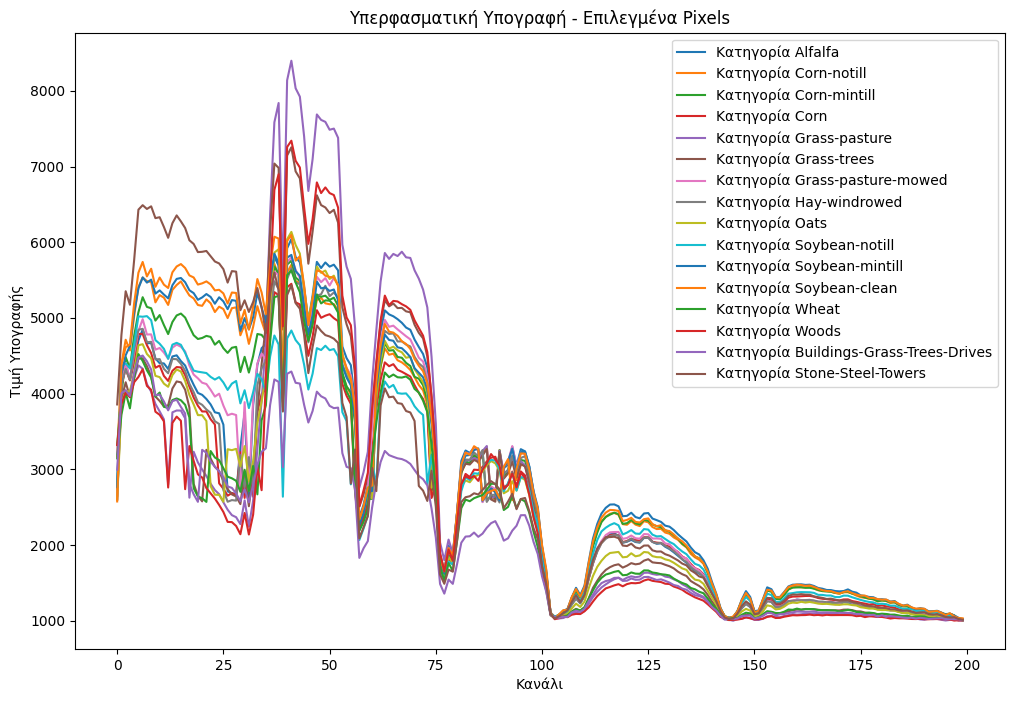

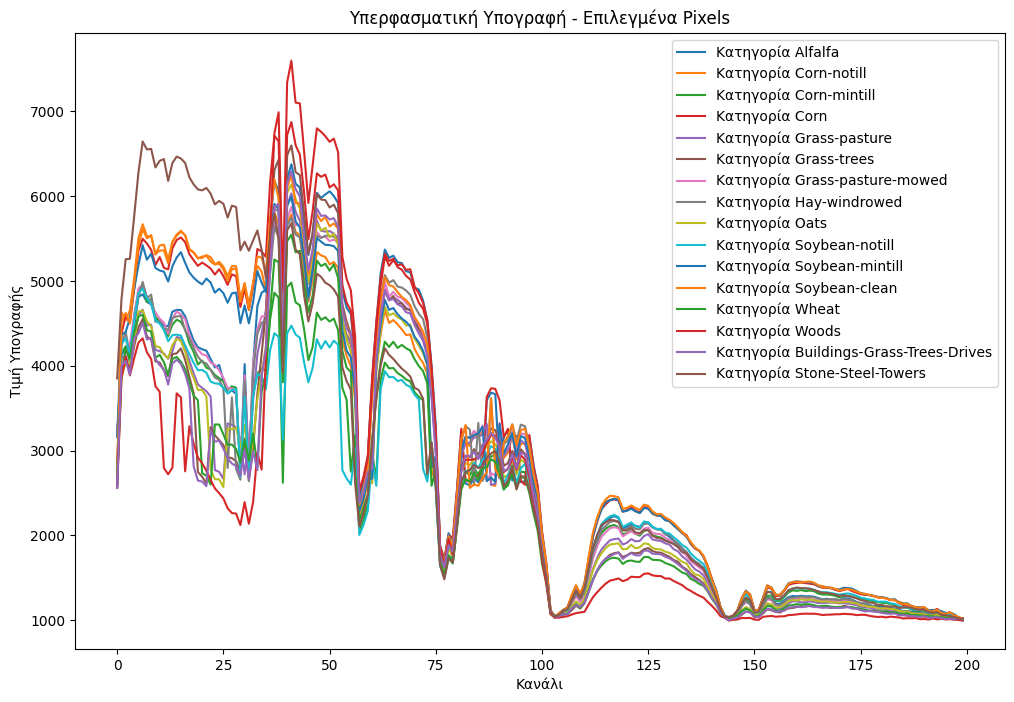

In [11]:
# 3δ. Επανάληψη για δύο ακόμη φορές
for _ in range(2):
    selected_pixels = []
    for label in unique_labels:
        indices = np.where(labels_reshaped == label)[0]
        random_index = np.random.choice(indices)
        selected_pixels.append(random_index)

    plt.figure(figsize=(12, 8))
    for i, index in enumerate(selected_pixels):
        plt.plot(image_reshaped[index], label=f"Κατηγορία {classes[i+1]}")

    plt.title("Υπερφασματική Υπογραφή - Επιλεγμένα Pixels")
    plt.xlabel("Κανάλι")
    plt.ylabel("Τιμή Υπογραφής")
    plt.legend()
    plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

3.ε. Απάντηση:
* Ορισμένες καλλιέργειες φαίνεται να είναι ευκολότερο να διαχωριστούν με βάση τη φασματική υπογραφή τους. Παρατηρώ πως πχ στα κανάλια απο 0 έως 75 σε γενικές γραμμές μπορεί κανείς να τα διαχωρίσει μεταξύ τους με βάση τις τιμές υπογραφής (οι γραμμές έχουν απόσταση μεταξύ τους)
* Όχι, για παράδειγμα, στα κανάλια από 75 έως 100 δεν είναι καθόλου διαχωρίσιμες οι τιμές υπερφασματικής υπογραφής και άρα η πληροφορία δεν είναι χρήσιμη για τον διαχωρισμό τους.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

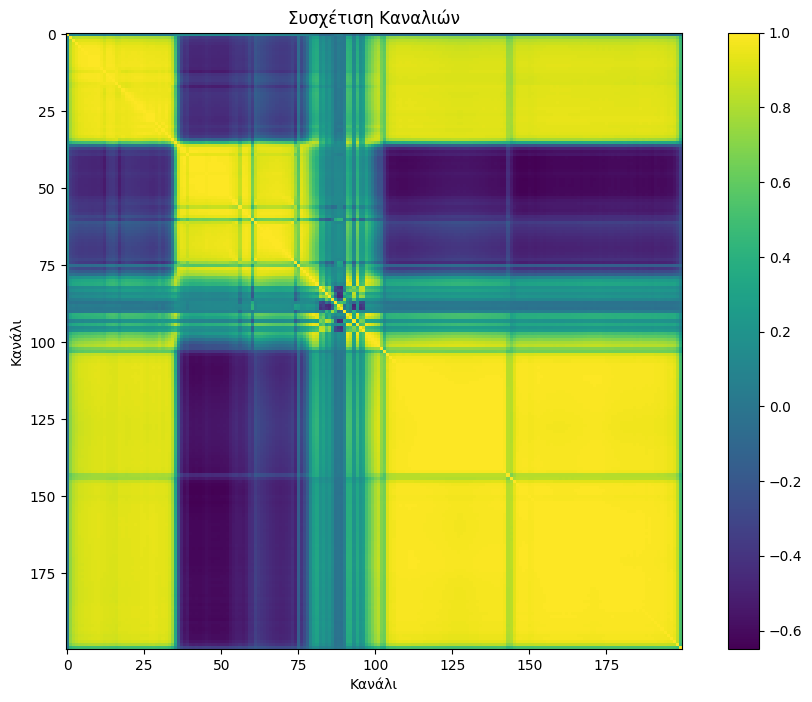

In [12]:
# 3στ. Σχεδίαση heatmap για τη συσχέτιση των καναλιών
correlation_matrix = np.corrcoef(image_reshaped.T)
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.title("Συσχέτιση Καναλιών")
plt.xlabel("Κανάλι")
plt.ylabel("Κανάλι")
plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [13]:
from sklearn.cluster import KMeans
n_clusters=16

# Εφαρμογή του αλγορίθμου k-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(image_reshaped)
cluster_centers = kmeans.cluster_centers_
labels_predicted = kmeans.labels_

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [14]:
!pip install munkres
from munkres import Munkres
# με τη βοηθεια αυτων των συναρτησεων:
def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [15]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

# Translate predicted labels using the provided function
translated_predicted_labels = translate_predicted_labels(labels_predicted, labels_reshaped -1) # -1 logw ths afaireshs tou undefined

# Calculate Accuracy Score
accuracy = accuracy_score(labels_reshaped-1, translated_predicted_labels)
print(f"Accuracy Score: {accuracy}")

# Calculate Rand Score
rand_score = adjusted_rand_score(labels_reshaped-1, translated_predicted_labels)
print(f"Rand Score: {rand_score}")

# Calculate Silhouette Score

silhouette = silhouette_score(image_reshaped-1, translated_predicted_labels)
print(f"Silhouette Score: {silhouette}")


map: 0 --> 14
map: 1 --> 15
map: 2 --> 9
map: 3 --> 4
map: 4 --> 12
map: 5 --> 3
map: 6 --> 7
map: 7 --> 11
map: 8 --> 8
map: 9 --> 5
map: 10 --> 1
map: 11 --> 10
map: 12 --> 6
map: 13 --> 13
map: 14 --> 2
map: 15 --> 0
Accuracy Score: 0.34735096106937263
Rand Score: 0.20385337950804414
Silhouette Score: 0.2838124536963247


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

(10249,)


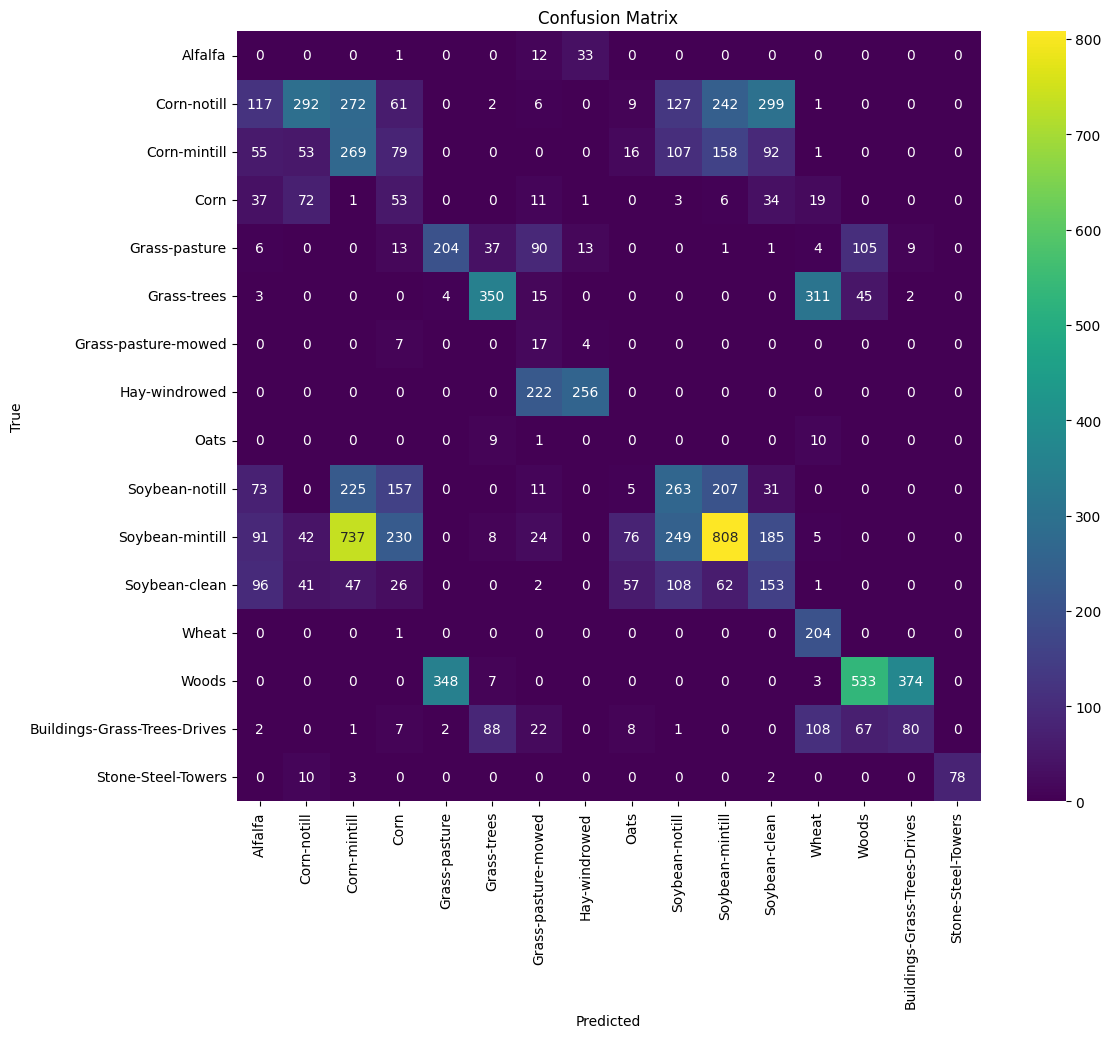

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(translated_predicted_labels.shape)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(labels_reshaped - 1, translated_predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=classes[1:], yticklabels=classes[1:])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

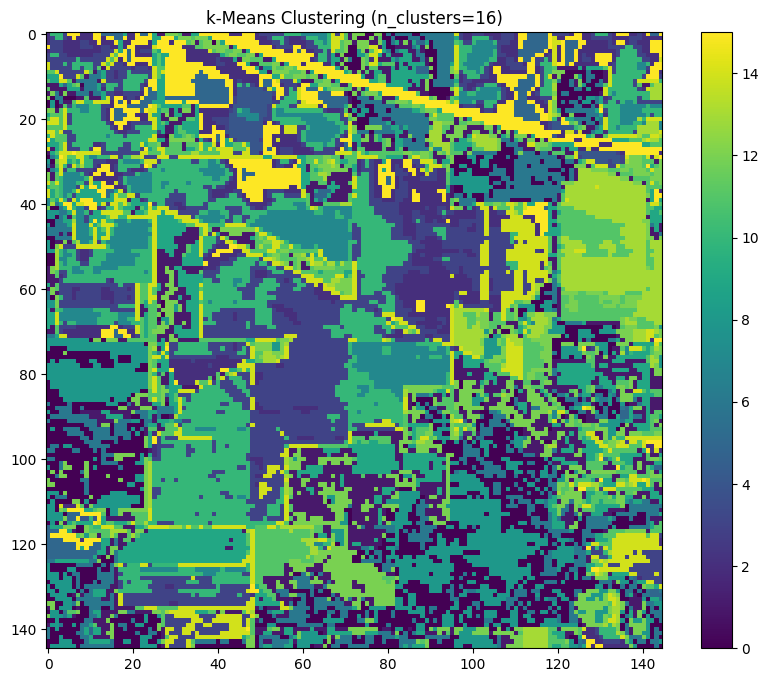

In [17]:
# 4ε. Σχεδίαση 

# Επανασχηματισμός των δεδομένων για την εφαρμογή του k-Means
X = indian_pines_image.reshape((-1, num_channels))

# Εφαρμογή του αλγορίθμου k-Means
n_clusters = 16
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Ανάθεση των ετικετών σε κάθε pixel
labels_kmeans = kmeans.labels_.reshape((height, width))

# Σχεδίαση του χάρτη των clusters
plt.figure(figsize=(10, 8))
plt.imshow(labels_kmeans, cmap='viridis')
plt.title(f'k-Means Clustering (n_clusters={n_clusters})')
plt.colorbar()
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [18]:
from sklearn.decomposition import PCA

# Εφαρμογή PCA με n_components=3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(image_reshaped)

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [19]:
# Ποσοστό διακύμανσης που εξηγείται από κάθε κύρια συνιστώσα
explained_variance_ratio = pca.explained_variance_ratio_

# Συνολικό ποσοστό διακύμανσης που διατηρείται
total_variance_retained = np.sum(explained_variance_ratio)

print("Ποσοστό διακύμανσης που εξηγείται από κάθε κύρια συνιστώσα:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Κύρια Συνιστώσα {i}: {ratio:.2%}")

print(f"\nΣυνολικό ποσοστό διακύμανσης που διατηρείται με n_components=3: {total_variance_retained:.2%}")

Ποσοστό διακύμανσης που εξηγείται από κάθε κύρια συνιστώσα:
Κύρια Συνιστώσα 1: 66.45%
Κύρια Συνιστώσα 2: 26.54%
Κύρια Συνιστώσα 3: 1.21%

Συνολικό ποσοστό διακύμανσης που διατηρείται με n_components=3: 94.20%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

# Εφαρμογή του αλγορίθμου k-Means στα δεδομένα PCA
kmeans_pca = KMeans(n_clusters=16, random_state=42, n_init=10)
kmeans_pca.fit(pca_result)  # pca_result είναι το αποτέλεσμα του PCA

# Πρόβλεψη ετικετών για τα δεδομένα
labels_predicted_pca = kmeans_pca.labels_

# Υπολογισμός μετρικών αξιολόγησης
# Translate predicted labels using the provided function
translated_predicted_labels_pca = translate_predicted_labels(labels_predicted_pca, labels_reshaped - 1)

# Calculate Accuracy Score
accuracy_pca = accuracy_score(labels_reshaped - 1, translated_predicted_labels_pca)
print(f"Accuracy Score with PCA: {accuracy_pca}")

# Calculate Rand Score
rand_score_pca = adjusted_rand_score(labels_reshaped - 1, translated_predicted_labels_pca)
print(f"Rand Score with PCA: {rand_score_pca}")

# Calculate Silhouette Score
silhouette_pca = silhouette_score(pca_result, translated_predicted_labels_pca)
print(f"Silhouette Score with PCA: {silhouette_pca}")

map: 0 --> 12
map: 1 --> 1
map: 2 --> 4
map: 3 --> 9
map: 4 --> 8
map: 5 --> 13
map: 6 --> 2
map: 7 --> 3
map: 8 --> 11
map: 9 --> 6
map: 10 --> 15
map: 11 --> 0
map: 12 --> 5
map: 13 --> 14
map: 14 --> 10
map: 15 --> 7
Accuracy Score with PCA: 0.3449116987023124
Rand Score with PCA: 0.20165540282004094
Silhouette Score with PCA: 0.37492168297295086


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

map: 0 --> 11
map: 1 --> 13
map: 2 --> 0
map: 3 --> 9
map: 4 --> 1
map: 5 --> 6
map: 6 --> 14
map: 7 --> 4
map: 8 --> 12
map: 9 --> 2
map: 10 --> 15
map: 11 --> 3
map: 12 --> 7
map: 13 --> 5
map: 14 --> 8
map: 15 --> 10
For n_components = 1:
Accuracy Score with PCA: 0.33759391160113184
Rand Score with PCA: 0.18250098364646425
Silhouette Score with PCA: 0.5263259178912185

map: 0 --> 12
map: 1 --> 0
map: 2 --> 13
map: 3 --> 9
map: 4 --> 15
map: 5 --> 11
map: 6 --> 5
map: 7 --> 3
map: 8 --> 1
map: 9 --> 14
map: 10 --> 8
map: 11 --> 10
map: 12 --> 6
map: 13 --> 4
map: 14 --> 2
map: 15 --> 7
For n_components = 2:
Accuracy Score with PCA: 0.33232510488828176
Rand Score with PCA: 0.19582136856812318
Silhouette Score with PCA: 0.38685044669292934

map: 0 --> 12
map: 1 --> 1
map: 2 --> 4
map: 3 --> 9
map: 4 --> 8
map: 5 --> 13
map: 6 --> 2
map: 7 --> 3
map: 8 --> 11
map: 9 --> 6
map: 10 --> 15
map: 11 --> 0
map: 12 --> 5
map: 13 --> 14
map: 14 --> 10
map: 15 --> 7
For n_components = 3:
Accurac

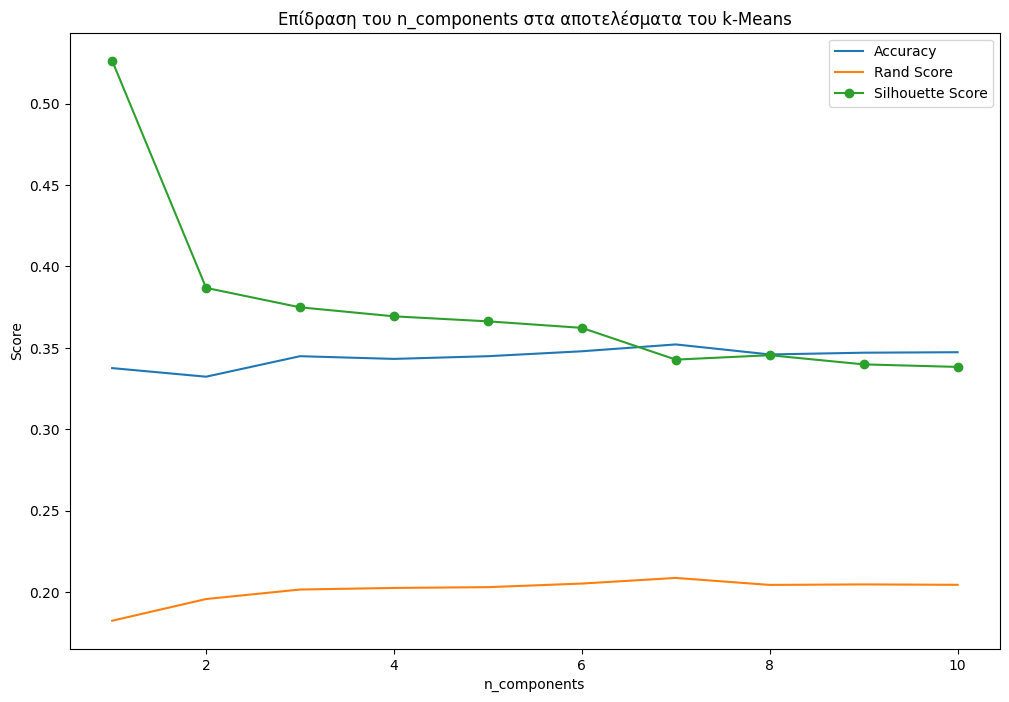

In [21]:
import matplotlib.pyplot as plt

# Δημιουργία λίστων για αποθήκευση των scores
accuracy_scores = []
rand_scores = []
silhouette_scores = []

# Δοκιμή των διαφορετικών τιμών για n_components
for n in range(1, 11):
    # Εφαρμογή PCA
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(image_reshaped)

    # Εφαρμογή k-Means στα δεδομένα PCA
    kmeans_pca = KMeans(n_clusters=16, random_state=42, n_init=10)
    kmeans_pca.fit(pca_result)

    # Πρόβλεψη ετικετών για τα δεδομένα
    labels_predicted_pca = kmeans_pca.labels_

    # Μετάφραση των προβλεπόμενων ετικετών
    translated_predicted_labels_pca = translate_predicted_labels(labels_predicted_pca, labels_reshaped - 1)

    # Υπολογισμός των scores
    accuracy = accuracy_score(labels_reshaped - 1, translated_predicted_labels_pca)
    rand_score = adjusted_rand_score(labels_reshaped - 1, translated_predicted_labels_pca)
    silhouette = silhouette_score(pca_result, translated_predicted_labels_pca)
    print(f"For n_components = {n}:")
    print(f"Accuracy Score with PCA: {accuracy}")
    print(f"Rand Score with PCA: {rand_score}")
    print(f"Silhouette Score with PCA: {silhouette}\n")
    
    # Αποθήκευση των scores στις λίστες
    accuracy_scores.append(accuracy)
    rand_scores.append(rand_score)
    silhouette_scores.append(silhouette)

# Σχεδίαση διαγράμματος
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), accuracy_scores, label='Accuracy')
plt.plot(range(1, 11), rand_scores, label='Rand Score')
plt.plot(range(1, 11), silhouette_scores, label='Silhouette Score', marker='o')

plt.title('Επίδραση του n_components στα αποτελέσματα του k-Means')
plt.xlabel('n_components')
plt.ylabel('Score')
plt.legend()
plt.show()

Παρατηρήσεις:

Από το παραπάνω διάγραμμα προκύπτει πως με την αύξηση του n_components:

* Το **Accuracy** αυξάνεται (μέχρι n_components=7). 
* Το **Silhouette score** μειώνεται (μέχρι n_components=7). Αυτό υποδεικνύει ότι οι ομάδες γίνονται λιγότερο καλά καθορισμένες σε συνδυασμό με ότι τα σημεία δεδομένων δεν μπορούν να ανατεθούν με σαφήνεια σε συγκεκριμένες ομάδες.
* Το **Rand score** αυξάνεται μέχρι (μέχρι n_components=7). Αυτό υποδεικνύει μια καλύτερη αντιστοιχία μεταξύ των πραγματικών και προβλεπόμενων ομάδων.

Από n_components=7 και πέρα παρατηρούμε πιθανώς υπερεκπαίδευση (καθώς το Accuracy και το Rand score φαίνεται να μειώνονται σε μικρό βαθμό).

Και τα 3 φαίνεται να συγκλίνουν το καθένα σε κάποιες τιμές καθώς το n_components αυξάνεται (όχι απαραίτητα τις ιδανικές)σης.